# 09. PLS 모형

<br>

## 09.01. PLS모형과 추정방법
- PLS (partial least square) : PLS모형 혹은 PLS추정 방법

<br>

### PLS모형
- **전통적인 구조방정식모형에서는 모든 잠재변수가 반영적 지표임을 가정**
    - 공분산 구조를 분석하는데 초점 (이런 측면에서, 전통적인 구조방정식모형을 CB-SEM이라고 부름)
    - 일반적으로 CB-SEM은 제안된 이론 모형이 표본에 잘 적합되는 지를 검증하는데 목적
    
        **즉, 확증된 이론 모형에 대하여 검증하고 확인하는 것이 연구의 주요 목적**
        
- **PLS모형의 경우에는 잠재변수를 규정하는 형태에 대한 제한이 없음**

    **내생변수가 가지는 변이(분산)를 설명하는데 초점을 두고 있으며, 내생변수에 대한 예측과 이론에 대한 탐색이 주요 목적**

<br>

**반영적 지표에서 잠재변수와 관찰변수들의 관계를 수식으로 표현**
- $\lambda_i$는 각 관찰변수가 해당 잠재변수와 얼마나 관련되어 있는지를 나타냄 (적재값)
- $\delta_i$는 관찰변수의 측정값 중 잠재변수와 구별되는 부분 (측정오차)
    - 해당 관찰변수의 특수성 또는 유일성으로 불림

$$\begin{cases}
X_1 = \lambda_1 Reflective + \delta_1\\
X_2 = \lambda_2 Reflective + \delta_2\\
X_3 = \lambda_3 Reflective + \delta_3\\
\end{cases}$$

<br>

**조형적 지표에서 잠재변수와 관찰변수들의 관계를 수식으로 표현**
$$Formative = w_1 X_1 + w_2 X_2 + w_3 X_3$$

- 즉, 잠재변수는 관찰변수들의 가중합으로 정의

<br>

### PLS 추정방법
- 전통적인 구조방정식모형에서는 다변량 정규분포에 근거한 최대우도 추정법을 사용하며, 관측된 공분산행렬과 예측된 공분산행렬이 가장 가깝게 되도록 모수를 추정
- **반면 PLS-SEM에서는 표본크기나 분포에 대한 가정이 강하지 않음**
    - 따라서 PLS-SEM은 어떤 상황에서는 CB-SEM에 대한 방법론적 대안이 될 수 있음
    - **또한 최소제곱법에 기반한 PLS(부분최소제곱) 추정법을 사용하며, 내상변수의 분산에 대한 설명력이 최대가 되도록 모수를 추정**
    
<br>

#### PLS-SEM을 사용할 때 주의사항
1. **PLS-SEM이 표본크기 문제에 대하여 완전히 자유로운 것이 아님**
    - 모든 통계적 방법은 모형과 데이터의 특성에 따라 적절한 표본크기가 요구되며 PLS-SEM도 예외가 아님
    
2. **정규성을 가정하지 않는 반대급부로서 기본적인 모수 추정치에 대한 유의성 검정이 불가능**
    - 대신 PLS-SEM에서는 비모수적 붓스트랩 방법을 사용하여 유의성 검정을 수행
    
3. **대부분의 적합도 측도들이 예측된 공분산행렬이 관측된 공분산행렬에 얼마나 적합되는지를 계산하므로, PLS-SEM에서는 모형의 적합도를 계산할 수 있는 측도가 제한적**
    
4. **CB-SEM과 PLS-SEM에 의한 추정치의 차이가 크지 않은 경우도 있으나, PLS-SEM에서는 구조모형의 계수는 과소추정되고 측정모형의 계수는 과대추정되는 경향 존재 (PLS-SEM 평향)**


<br>

## 09.02. semPLS 패키지

In [2]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)
library(psych)
library(tidyverse)

In [3]:
detach("package:sem",unload=TRUE)

Warning message:
"'sem' namespace cannot be unloaded:
  namespace 'sem' is imported by 'semPlot' so cannot be unloaded"


In [4]:
Jobsatis <- read.csv(paste0(getwd(), "/Data/Jobsatis.csv"), header = TRUE)

In [11]:
library(semPLS)

Loading required package: lattice



In [12]:
Job_mm <- read.csv(paste0(getwd(), "/Data/Job_mm.csv"), header = TRUE) %>% as.matrix()
Job_mm

Source,Target
Achmot1,ACHMOT
Achmot2,ACHMOT
Tsse1,TSSE
Tsse2,TSSE
Verbint1,VERBINT
PERFORM,Perform1
JOBSATIS,Jobsatis1
JOBSATIS,Jobsatis2


In [13]:
Job_sm <- read.csv(paste0(getwd(), "/Data/Job_sm.csv"), header = TRUE) %>% as.matrix()
Job_sm

Source,Target
TSSE,PERFORM
ACHMOT,JOBSATIS
VERBINT,JOBSATIS
PERFORM,JOBSATIS


<br>

#### `plsm(data, measuremod, strucmod)` : 측정모형과 구조모형으로 PLS객체 생성
- `measuremod` : 측정모형에 대한 행렬
- `strucmod` : 구조모형에 대한 행렬

In [19]:
Job_PLS <- plsm(Jobsatis, measuremod = Job_mm, strucmod = Job_sm)

Warning message in ncol(strucmod) != 2 || mode(strucmod) != "character" || class(strucmod) != :
"'length(x) = 2 > 1' in coercion to 'logical(1)'"
Warning message in ncol(measuremod) != 2 || mode(measuremod) != "character" || class(measuremod) != :
"'length(x) = 2 > 1' in coercion to 'logical(1)'"


#### `mvpairs()` : 각 잠재변수들을 구성하는 관찰변수들에 대하여 상관계수, 산점도, 분포도 출력

Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


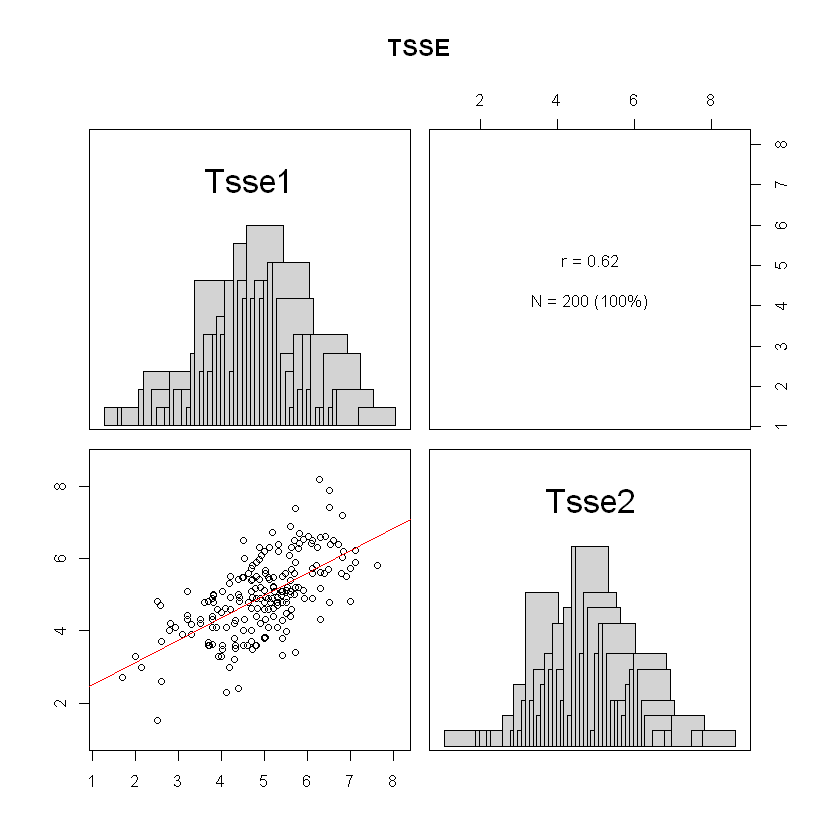

Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


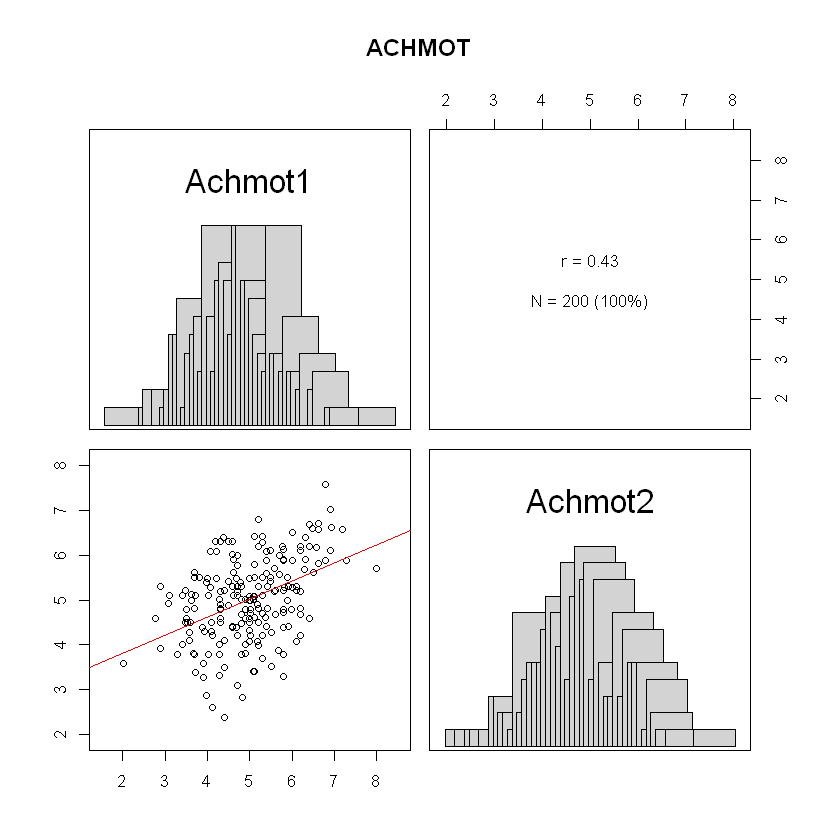

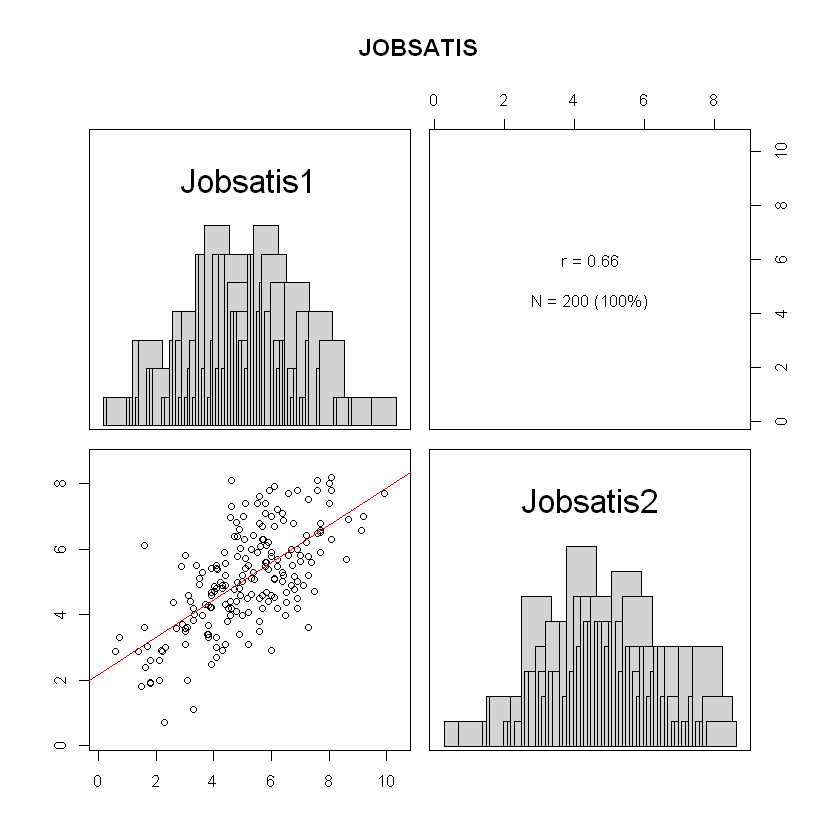

In [20]:
mvpairs(model = Job_PLS, Jobsatis)

#### `sempls()` : 설정된 모형과 데이터를 기초로 모형을 적합하고, 그 결과를 새로운 객체에 저장

In [21]:
Job_PLS.fit <- sempls(Job_PLS, Jobsatis)

All 200 observations are valid.
Converged after 9 iterations.
Tolerance: 1e-07
Scheme: centroid


<br>

### `pathCoeff()` : 구조모형에서의 경로계수에 대한 추정치 출력

<br>

- 'TSSE $\rightarrow$ PERFORM'에 대한 추정치는 0.646

In [24]:
print(pathCoeff(Job_PLS.fit), digits = 3)

         TSSE ACHMOT PERFORM VERBINT JOBSATIS
TSSE        .      .   0.646       .        .
ACHMOT      .      .       .       .    0.383
PERFORM     .      .       .       .    0.472
VERBINT     .      .       .       .    0.160
JOBSATIS    .      .       .       .        .


<br>

### `rSquared()` : 구조모형에서의 결정계수 출력

<br>

- 'PERFORM'에 결정계수는 41.7%

In [26]:
print(rSquared(Job_PLS.fit), digis = 3)

         R-squared
TSSE             .
ACHMOT           .
PERFORM       0.42
VERBINT          .
JOBSATIS      0.38


<br>

### `totalEffects()` : 구주모형에서의 총효과 출력

<br>

- TSSE $\rightarrow$ PERFORM에 대한 총효과는 0.646

In [28]:
print(totalEffects(Job_PLS.fit), digits = 3)

         TSSE ACHMOT PERFORM VERBINT JOBSATIS
TSSE        .      .   0.646       .    0.305
ACHMOT      .      .       .       .    0.383
PERFORM     .      .       .       .    0.472
VERBINT     .      .       .       .    0.160
JOBSATIS    .      .       .       .        .


<br>

### `plsWeights()` : 측정모형에서 조형적 지표에 대한 가중치를 출력
- 반영적 지표에 대하여는 적재값이 먼저 추정되고, 가중치가 계산

<br>

- 잠재변수 TSSE는 아래와 같이 규정

$$TSSE = 0.792 \times Tsse1 + 0.291 \times Tsse2$$

In [30]:
print(plsWeights(Job_PLS.fit), digits = 3)

           TSSE ACHMOT PERFORM VERBINT JOBSATIS
Tsse1     0.792      .       .       .        .
Tsse2     0.291      .       .       .        .
Achmot1       .  0.678       .       .        .
Achmot2       .  0.500       .       .        .
Perform1      .      .   1.000       .        .
Verbint1      .      .       .   1.000        .
Jobsatis1     .      .       .       .    0.565
Jobsatis2     .      .       .       .    0.534


<br>

### `plsLoadings()` : 측정모형에서 반영적 지표에 대한 적재값 출력
- 적재값은 각 관찰변수와 잠재변수의 연관성(상관계수)를 의미

**판별 적재값 : 잠재변수와 그 잠재변수를 규정하는 관찰변수들의 상관계수**
- **따라서 판별 적재값이 높아야 집중 타당도에 문제가 없는 것으로 평가**
- 아래 결과에서는 적재값이 모두 0.7이상 $\rightarrow$ 집중 타당도에 문제가 없음


In [32]:
print(plsLoadings(Job_PLS.fit), type = c("discriminant"), digits = 3)

           TSSE ACHMOT PERFORM VERBINT JOBSATIS
Tsse1     0.974      .       .       .        .
Tsse2     0.785      .       .       .        .
Achmot1       .  0.892       .       .        .
Achmot2       .  0.790       .       .        .
Perform1      .      .   1.000       .        .
Verbint1      .      .       .   1.000        .
Jobsatis1     .      .       .       .    0.916
Jobsatis2     .      .       .       .    0.905


<br>

**교차 적재값 : 잠재변수와 그 잠재변수를 규정하지 않는 관찰변수들의 상관계수**
- **따라서 교차 적재값이 낮아야 변별 타당도에 문제가 없는 것으로 평가**
- 아래 결과에서는 판별 적재값과 교차 적재값이 출력

In [33]:
print(plsLoadings(Job_PLS.fit), type = c("cross"), digits = 3)

             TSSE  ACHMOT PERFORM VERBINT JOBSATIS
Tsse1      0.9738  0.3751  0.6291 -0.3333   0.5428
Tsse2      0.7851  0.3398  0.5072 -0.2771   0.4354
Achmot1    0.3383  0.8918  0.1789 -0.3886   0.3708
Achmot2    0.3332  0.7903  0.2152 -0.4081   0.3286
Perform1   0.6460  0.2290  1.0000 -0.2788   0.5149
Verbint1  -0.3447 -0.4676 -0.2788  1.0000  -0.1502
Jobsatis1  0.4945  0.3765  0.4588 -0.1760   0.9157
Jobsatis2  0.5200  0.3808  0.4794 -0.0951   0.9050


<br>

## 09.03. 붓스트랩 검정
- **PLS-SEM은 정규성을 가정하지 않음으로서, 붓스트랩 방법을 사용하여 유의성 검정을 수행**

<br>

#### `bootsempls(nboot)` : 붓스트랩 방법을 통한 유의성 검정

In [36]:
Job_PLS.Boot <- bootsempls(Job_PLS.fit , nboot = 1000, verbose = FALSE)

In [35]:
Job_PLS.Boot

Call: bootsempls(object = Job_PLS.fit, nboot = 1000, verbose = FALSE)

                      Estimate      Bias Std.Error
Tsse1 -> TSSE            0.792 -1.34e-03  9.42e-02
Tsse2 -> TSSE            0.291 -3.64e-03  1.17e-01
Achmot1 -> ACHMOT        0.678 -1.45e-02  1.46e-01
Achmot2 -> ACHMOT        0.500  8.58e-04  1.60e-01
PERFORM -> Perform1      1.000  1.11e-16  5.72e-17
Verbint1 -> VERBINT      1.000  0.00e+00  1.14e-16
JOBSATIS -> Jobsatis1    0.916 -7.51e-04  1.46e-02
JOBSATIS -> Jobsatis2    0.905 -1.90e-03  1.88e-02
TSSE -> PERFORM          0.646  2.48e-03  3.81e-02
ACHMOT -> JOBSATIS       0.383  4.58e-03  6.15e-02
PERFORM -> JOBSATIS      0.472 -6.88e-03  5.42e-02
VERBINT -> JOBSATIS      0.160 -4.77e-03  5.45e-02

- 붓스트랩 신뢰구간 출력
    - 편향 조정 (bias-corrected) 신뢰구간 출력 : `type`을 `"bca"`로 입력 

- 아래 결과에서 `gam`으로 표현된 계수들은 조형적 지표에 대한 가중치

    `lam`으로 표현된 계수들은 반영적 지표에 대한 적재값
    
    `beta`로 표현된 계수들은 구조모형에서의 경로계수
    
- **신뢰구간이 0을 포함하고 있지 않으면 귀무가설 $H_0 : \beta_i = 0$을 기각**

In [37]:
summary(Job_PLS.Boot, type = "bca", level = 0.95)

Call: bootsempls(object = Job_PLS.fit, nboot = 1000, verbose = FALSE)

Lower and upper limits are for the 95 percent bca confidence interval

         Estimate      Bias Std.Error  Lower Upper
gam_1_1     0.792 -4.06e-03  9.38e-02 0.5965 0.967
gam_1_2     0.291 -3.49e-04  1.16e-01 0.0505 0.509
gam_2_1     0.678 -1.34e-02  1.45e-01 0.3722 0.928
gam_2_2     0.500 -5.73e-04  1.63e-01 0.1389 0.774
lam_3_1     1.000  1.11e-16  5.87e-17      .     .
gam_4_1     1.000  0.00e+00  1.16e-16      .     .
lam_5_1     0.916 -3.03e-04  1.44e-02 0.8820 0.939
lam_5_2     0.905 -1.13e-03  1.85e-02 0.8565 0.932
beta_1_3    0.646  1.47e-03  3.62e-02 0.5625 0.708
beta_2_5    0.383  1.06e-03  6.01e-02 0.2621 0.497
beta_3_5    0.472 -1.07e-04  5.44e-02 0.3462 0.564
beta_4_5    0.160 -3.72e-03  5.79e-02 0.0543 0.285
Call: bootsempls(object = Job_PLS.fit, nboot = 1000, verbose = FALSE)

Lower and upper limits are for the 95 percent bca confidence interval

         Estimate      Bias Std.Error  Lower Upper
ga